# COGS 108 - Case Study: Impact of Ridesharing on GHG Emissions in New York City

# Names

- Vasny Bautista
- Saikrishna Chandhrasekhar
- Andrew Li
- Brian Li
- Alice Lu

# Overview

Climate change has become an increasingly pressing issue over the course of many years. Intuitively, the onset of ridesharing services seems to be a step in the right direction by reducing the amount of cars on the road. In this project, we investigate the possible effects of ridesharing on greenhouse gas emissions and pre-existing transportation services such as buses, taxis, and the subway in order to find out if ridesharing mitigates climate change in some way. Our results showed that ridesharing was strongly correlated with a decline in subway usage and an increase in greenhouse gas emissions, although further study will be required to discover more about this relationship.

<a id='research_question'></a>
# Research Question

How has the adoption of ridesharing affected the GHG emissions in a populous city with a pre-existing reliance on car services like New York City? 

<a id='background'></a>

## Background & Prior Work

With the effects of climate change becoming more apparent and environmental awareness increasing, humans have begun to make progress towards mitigating the effects of global warming. This is further emphasized by the U.S. recently rejoining the Paris Climate Agreement. While the adoption of alternative green energy will certainly help, this issue won’t be completely solved without addressing transportation, which is among the fastest growing sectors of CO2 emissions [2]. By taking cars off the road and providing options to increase the number of riders per vehicle, ride sharing is often seen as the solution to this problem or at least a step towards the right direction.

“Do transportation network companies decrease or increase congestion?” [1] is an article that tackles the mixed findings in regards to the impact of ridesharing on congestion by conducting a case study in San Francisco. Using background traffic estimates, ridesharing data, and speed data, the study concludes that, at least in San Francisco, the growth of ridesharing from 2010 to 2016 led to higher congestion, worse travel times, and additional cars on the road. Using congestion and the number of cars on the road as a proxy for CO2 emissions, this study presents findings that support the view that ridesharing would be detrimental to the movement towards becoming more environmentally friendly. 

“Appraising the environmental benefits of ride-sharing: The Paris region case study” [2] investigates the potential for CO2 emission mitigation from ride sharing due to the expected increase in vehicle occupancy and decrease in number of vehicles on the road. Specifically, the study utilizes models to study the short-, medium-, and long-term effects of ride sharing by analyzing scenarios in the Paris region in 2030. Using these models, the study finds an expected slight decrease in CO2 emissions from 2015 to 2030 and presents the decrease in congestion from ride sharing as a potential cause.

From these two studies, it’s clear that there are many factors that impact the effect of ride sharing in a particular region. Furthermore, it’s shown that two case studies on ride sharing with different settings could come up with different conclusions. Specifically, factors like population density, prevalence of existing taxi infrastructure, and road density can all affect the type of impact ride sharing will have. Furthermore, the replacement of individual car ownership in favor of ride sharing will likely take time and might depend on the region’s general sentiment towards the programs. Our study attempts to extend on these studies by analyzing more recent data as well as considering New York City, a city with a high population density and a pre-existing reliance on similar services (taxis).

References (include links):
- 1)https://advances.sciencemag.org/content/5/5/eaau2670 
- 2)https://www.researchgate.net/publication/322109892_Appraising_the_environmental_benefits_of_ride-sharing_The_Paris_region_case_study

# Hypothesis


We believe that following the adoption and popularity of ridesharing in New York City, there will be an overall reduction in GHG emissions. This belief is driven by our understanding that ridesharing is more efficient because it increases vehicle occupancy with services like pool and it leverages better algorithm-driven routing paths.

# Datasets

- Dataset Name: FHV Base Aggregate Report
- Link to the dataset: https://data.cityofnewyork.us/Transportation/FHV-Base-Aggregate-Report/2v9c-2k7f
- Number of observations: 33964

The FHV Base Aggregate Report contains a collections of monthly aggregated reports of total dispatched trips, total dispatched shared trips, and total unique dispatched vehicles for various for-hire companies in NYC. We are particularly interested in the total dispatched trips for high-volume for-hire providers like Uber, Lyft, Juno, and Via.

- Dataset Name: TLC Aggregate Trip Record Data
- Link to the dataset: https://www1.nyc.gov/site/tlc/about/aggregated-reports.page
- Number of observations: 508

The TLC Aggregate Trip Record Data contains a collection of monthly aggregated data points for taxis and various for-hire vehicles in NYC. We are most interested in the average daily trips, daily vehicles, and daily shared trips for high-volume for-hire vehicles as well as taxis.

The FHV Base Aggregate Report and TLC Aggregate Trip Record Data are used together to analyze the impact of ride sharing in New York City. While the TLC Aggregate Trip Record Data provides us a view of the impact of ride sharing as a whole, the FHV Base Aggregate Report allows us to disect the impact of each individual company.

- Dataset Name: NYC GHG Inventory
- Link to the dataset: https://nyc-ghg-inventory.cusp.nyu.edu/
- Number of observations: 15

This dataset contains the greenhouse gas (carbon dioxide) emissions in New York City from 2005 to 2019 provided and made public by the Mayor's Office of Sustainability. We are primarily interested in the carbon dioxide emissions from passenger cars aspect of the data.

- Dataset Name: NYC Bus Ridership, NYC Subway Ridership
- Link to the dataset: https://www.baruch.cuny.edu/nycdata/travel/mta-busridership.html, https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2019
- Number of observations: 9

These two datasets were combined into an excel file. It contains the annual number of subway and bus trips in New York City from 2009 to 2019. This data was provided by the Metropolitan Transportation Authority (MTA) and made public by both the MTA and Baruch College. However, we are primarily interested in using the subway data as our confounding variable.

# Setup

In [1]:
import pandas as pd
import math
import numpy as np

In [2]:
## Dataset URLs / Paths

## FHV Base Aggregate Data
fhv_agg = './FHV_Base_Aggregate_Report.csv'

## TLC Aggregate Trip Record Data
tlc_agg = './data_reports_monthly.csv'

## GHG Inventory Data
ghg = './NYC_GHG_Inventory.csv'

## NYC Bus Data
bus = './MTA_bus.xlsx'

## NYC Subway Data
subway = './MTA_subway.xlsx'

# Data Cleaning

## FHV Base Aggregate Report

The FHV Base Aggregate Report contains monthly aggregated data of Total Dispatched Trips, Total Dispatch Shared Trips, and Unique Dispatched Vehicles for various for-hire vehicle companies in NYC. This includes limousines, black cars, and etc. However, since the purpose of this dataset is to show any intricacies of ridesharing not represented in the TLC dataset, we'll filter out all companies except for Uber, Lyft, Via, and Juno. Furthermore, we'll be excluding any data points from 2020 since the impact of COVID-19 makes them outlier of the overall trend.

For the attributes, we removed all attributes except for DBA, Month, Year, and Total Dispatched Trips. Since we're using this dataset alongside the TLC dataset, many of the attributes are redundant. Similarly, the Base License Number and Base Name are removed since they're the same as the DBA for ridesharing companies.

Given that our data is already in a CSV format, it's in the best structure so there's little work needed to format it. Looking at the types of the attributes, the integer values are also int types so we don't have to perform any reformatting. The only conversion is the change of separate Month and Year columns to a column of datetime objects. This is largely for better sorting and plotting.

In [3]:
## List of High-Volume For-Hire Vehicle Companies
high_volume = ['UBER', 'LYFT', 'VIA', 'JUNO']

## Read FHV aggregate csv
fhv_d = pd.read_csv(fhv_agg)

## Filter out non-high-volume FHV Companies + data points in 2020
fhv_d = fhv_d[(fhv_d['Base License Number'].isin(high_volume)) & (fhv_d['Year'] != 2020)].reset_index(drop=True)

## Remove uneeded columns
fhv_d = fhv_d.drop(columns=['Month Name', 'Base License Number', 'Base Name', 'Unique Dispatched Vehicles', 'Total Dispatched Shared Trips'])

## Convert Year and Month into a single Date columns
fhv_d['Date'] = fhv_d.apply(lambda row: str(row['Year']) + '-' + str(row['Month']), axis=1)
fhv_d['Date'] = pd.to_datetime(fhv_d['Date'])
fhv_d = fhv_d.drop(columns=['Year', 'Month'])

## Reorder
fhv_d = fhv_d[['DBA', 'Date', 'Total Dispatched Trips']]

In [4]:
fhv_d.head()

,DBA,Date,Total Dispatched Trips
0,JUNO,2019-06-01,674704
1,VIA,2017-03-01,728254
2,JUNO,2018-02-01,1329836
3,UBER,2018-10-01,14663999
4,UBER,2015-09-01,3709270


## TLC Aggregate Trip Record Data

The TLC Aggregate Trip Record Data contains a monthly aggregate of trip data across taxis and for-hire vehicles. From this dataset, we create two views: an annual and monthly representation of the dataset. In both views, we aggregate all non-ridesharing values to better distinguish the impact of ridesharing in relation to pre-existing car services. We also keep the original dataset for times when it may be useful to visualize the non-ridesharing trends separately. Similar to the previous dataset, we also excludes data points from 2020.

For the attributes, we filter out irrelevant data for our study like the percent paid with credit card, unique drivers, and etc. This results in a dataset containing only Month/Year, License Class, Trips Per Day, Vehicles Per Day, and Trips Per Day Shared.

Similar to the previous dataset, the structure is representative of tidy data so there's little to do in terms of structure. However, looking at the types, many of the number values are actually strings. This is because of the commas in the values. As a result, we'll need to perform some reformatting to get the strings into int. Furthermore, to better understand these values in monthly and annual intervals, we converted the averages back to their totals. An exception to this is the Vehicles Per Day attribute. When translating this value from month to year, we simply represented this value with the average of the year. Lastly, we converted the Month/Year column into a column of datetime objects for easier plotting.

Something else we need to do is handle null values (-). Looking at the attributes, the null values are more equivalent to 0 but are represented by '-' to denote that the attribute is irrelavant to the particular observation. Since this difference isn't important to our study, we'll replace the null values with 0.

In [5]:
## License_class for ridesharing
ridesharing_license_class = 'FHV - High Volume'

## Read TLC aggregate csv
tlc_d = pd.read_csv(tlc_agg, thousands=',')

## Filter out non-taxi and non-high-volume-FHV + data points in 2020
tlc_d = tlc_d[~tlc_d['Month/Year'].str.startswith('2020')].reset_index(drop=True)

## Keep only needed columns
tlc_d = tlc_d[['Month/Year', 'License Class', 'Trips Per Day', 'Vehicles Per Day', 'Trips Per Day Shared']] 

## Handle null values
def helper(s):
    try:
        return 0 if s == '-' else int(s.replace(',', ''))
    except Exception: # handles nan values in the dataset
        return 0

tlc_d['Trips Per Day Shared'] = tlc_d['Trips Per Day Shared'].apply(helper)

## Split Month/Year into two separate columns + create new datetime column
tlc_d['Month/Year'] = pd.to_datetime(tlc_d['Month/Year'])
tlc_d = tlc_d.rename(columns = {'Month/Year': 'Date'})

## Separate Dataset into 2 groups: high-volume FHV (ridesharing) and other
tlc_d_rs = tlc_d[tlc_d['License Class'] == ridesharing_license_class].reset_index(drop=True)
tlc_d_rs = tlc_d_rs.drop(columns=['License Class'])
tlc_d_rs['Ridesharing'] = [True] * tlc_d_rs.shape[0]

tlc_d_o = tlc_d[tlc_d['License Class'] != ridesharing_license_class]
tlc_d_o = tlc_d_o.groupby(['Date'], as_index=False).agg('sum')
tlc_d_o['Ridesharing'] = [False] * tlc_d_o.shape[0]

## Helper list and function
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

## Merge sub-datasets back together (use column to determine if the row is associated with ridesharing)
trip_month = tlc_d_rs.append(tlc_d_o, ignore_index=True)

## Convert average columns to "actual" amount
## Note: This will result in a loss of data due to rounding from averaging and un-average, but the impact is negligible
def unaverage(row):
    d = days[row['Date'].month-1]
    l = 1 if row['Date'].month == 2 and is_leap_year(row['Date'].year) else 0
    row['Trips Per Day'] = row['Trips Per Day'] * (d+l)
    row['Trips Per Day Shared'] = row['Trips Per Day Shared'] * (d+l)
    return row

trip_month = trip_month.apply(unaverage, axis=1)
trip_month.columns = ['Date', 'Trips', 'Vehicles Per Day', 'Trips Shared', 'Ridesharing']

## Create dataset w/ an annual granularity to merge with GHG-emissions
trip_year = trip_month.copy(deep=True)

## Only want the year from Date
trip_year.insert(0, 'Year', [x.year for x in trip_year['Date']])

## Drop month-specific attributes
trip_year = trip_year.drop(columns=['Date'])
# trip_year = trip_year.drop(columns=['Vehicles Per Day'])

trip_year_rs = trip_year[trip_year['Ridesharing'] == True]
trip_year_o = trip_year[trip_year['Ridesharing'] == False]
trip_year_rs = trip_year_rs.drop(columns=['Ridesharing'])
trip_year_o = trip_year_o.drop(columns=['Ridesharing'])

trip_year_rs = trip_year_rs.groupby(['Year'], as_index=False).agg({'Trips': 'sum', 'Vehicles Per Day': np.mean, 'Trips Shared': 'sum'})
trip_year_o = trip_year_o.groupby(['Year'], as_index=False).agg({'Trips': 'sum', 'Vehicles Per Day': np.mean, 'Trips Shared': 'sum'})

trip_year = trip_year_o.merge(trip_year_rs, how='outer', on='Year')
trip_year.fillna(0, inplace=True)
trip_year['Trips_y'] = trip_year['Trips_y'].apply(lambda x: int(x))
trip_year['Trips Shared_y'] = trip_year['Trips Shared_y'].apply(lambda x: int(x))
trip_year.columns = ['Year', 'Trips', 'Vehicles Per Day', 'Trips Shared', 'Ridesharing Trips', 'Ridesharing Vehicles Per Day', 'Ridesharing Trips Shared']

In [6]:
trip_month.head()

,Date,Trips,Vehicles Per Day,Trips Shared,Ridesharing
0,2019-12-01,22242407,55796,2896051,True
1,2019-11-01,21635100,57241,3101370,True
2,2019-10-01,21161685,57764,3337956,True
3,2019-09-01,20055600,56795,3233400,True
4,2019-08-01,20117791,55289,3254473,True


In [7]:
trip_year

,Year,Trips,Vehicles Per Day,Trips Shared,Ridesharing Trips,Ridesharing Vehicles Per Day,Ridesharing Trips Shared
0,2010,168983489,11801.250000,0,0,0.000000,0
1,2011,176866900,12583.916667,0,0,0.000000,0
2,2012,178513534,12783.166667,0,0,0.000000,0
3,2013,174347005,13109.666667,0,0,0.000000,0
4,2014,180939169,16884.250000,0,0,0.000000,0
5,2015,187111775,27513.166667,0,41616185,12699.833333,0
6,2016,187019007,33583.750000,0,92660314,24688.916667,0
7,2017,157014100,30352.333333,2161,158869576,40155.000000,18705332
8,2018,137526874,26054.083333,558601,232823451,52068.333333,56566206
9,2019,110063989,22034.833333,4154,255766521,57767.166667,44788578


## The NYC GHG Inventory Data

The NYC GHG Inventory Data has a record of the carbon dioxide emissions from transportation activities in NYC from 2005 to 2019. We are only interested in carbon dioxide emissions from passenger cars, therefore we will filter out all data that are not from passenger cars. We'll also transpose the dataset so that the data is indexed by year in order to more easily join with the other datasets.

In [8]:
# Read GHG Inventory csv into a dataframe
ghg_d = pd.read_csv(ghg)

# renaming and dropping irrelevant columns
ghg_d = ghg_d[ghg_d['Unnamed: 2']=='Passenger cars']
ghg_d = ghg_d.drop(columns=['None','Unnamed: 1','Unnamed: 2','% change from CY 2005','% change from CY 2005.1','% change from CY 2005.2'])

# transposing dataset
ghg_d = ghg_d.T

# separating dataset by emissions and consumption
emissions = ghg_d.filter(regex="\.1$",axis=0)
energy_c = ghg_d.filter(regex="CY 20[0-9][0-9]$",axis=0)

# unifying index names
emissions.index = emissions.index.map(lambda x: str(x)[:-2])

# merging the separated dataframes
ghg_d=pd.merge(emissions, energy_c, left_index=True, right_index=True)

# renaming the columns to reflect new dataframe
ghg_d = ghg_d.rename(columns={'5_x':'GHG Emissions','5_y':'Energy Consumed'})

# keeping only the year in the index
ghg_d.index = ghg_d.index.map(lambda x: int(str(x)[2:]))
ghg_d

,GHG Emissions,Energy Consumed
2005,12860259.42,19318051038.0
2006,12834648.38,19389437571.0
2007,12786717.87,19460823717.0
2008,12738071.51,19532209863.0
2009,12688731.8,19603599094.0
2010,12638851.49,19674985867.0
2011,12588207.02,19746372641.0
2012,12537074.99,19817759414.0
2013,12485130.45,19889146187.0
2014,12426507.4,19959361647.0


All the numbers in the DataFrame are strings, so now we will change them into integers.

In [9]:
def standardize_number(number):
    number = number.strip()
    split_string = number.split(".", 1)

    return int(split_string[0])

ghg_d['Energy Consumed'] = ghg_d['Energy Consumed'].apply(standardize_number)
ghg_d['GHG Emissions'] = ghg_d['GHG Emissions'].apply(standardize_number)

## NYC Bus and Subway Ridership
We gathered the bus and subway data from 2 separate sources. The first source (MTA) only had data from year 2014 to 2019 and the second source (baruchcuny.edu) only had data from 2009 to 2017. Both sources originated from MTA, but we were not able to find the combined years, so we manually compiled all the data into 2 separate spreadsheets. The compiled data has a record of rides from subways and buses in NYC from 2009 to 2019. We are only interested in the annual total rides per year from subways and buses, therefore we will filter out all else data.

In [10]:
## Read Bus and Subway csv
bus_d=pd.read_excel(bus,
header=[1]
) 
subway_d=pd.read_excel(subway,
header=[1]
)

## drop unnecessary columns
bus_d = bus_d.drop(columns=['Average Weekday','Average Saturday','Average Sunday','Average Sunday','Average Weekend'])
subway_d = subway_d.drop(columns=['Average Weekday','Average Saturday','Average Sunday','Average Sunday','Average Weekend'])

## join bus and subway data and drop repeat columns
public_trans = bus_d.join(subway_d,lsuffix='_bus', rsuffix='_subway')
public_trans.columns = public_trans.columns.map(str)
for i in range(len(public_trans.columns)):
    if i == 0:
        public_trans = public_trans.rename(columns={public_trans.columns[i]: "Year"})
    elif i == 2:
        public_trans = public_trans.drop(columns=[public_trans.columns[i]])
public_trans

,Year,Annual Total_bus,Annual Total_subway
0,2009,716824107,1579866600
1,2010,696923393,1604198017
2,2011,670698694,1640434672
3,2012,667910621,1654582265
4,2013,677569432,1707555714
5,2014,667051170,1751287621
6,2015,650681784,1762565419
7,2016,638413113,1756814800
8,2017,602620356,1727366607
9,2018,569361220,1680060402


In [11]:
# Merge TLC, GHG, and Public Transportation
annual_data = ghg_d.merge(trip_year, left_index=True, right_on='Year')
annual_data = annual_data[['Year', 'GHG Emissions', 'Energy Consumed', 'Trips', 'Trips Shared', 'Ridesharing Trips', 'Ridesharing Trips Shared', 'Vehicles Per Day', 'Ridesharing Vehicles Per Day']]
annual_data = annual_data.merge(public_trans, left_on='Year', right_on='Year')

annual_data

,Year,GHG Emissions,Energy Consumed,Trips,Trips Shared,Ridesharing Trips,Ridesharing Trips Shared,Vehicles Per Day,Ridesharing Vehicles Per Day,Annual Total_bus,Annual Total_subway
0,2010,12638851,19674985867,168983489,0,0,0,11801.250000,0.000000,696923393,1604198017
1,2011,12588207,19746372641,176866900,0,0,0,12583.916667,0.000000,670698694,1640434672
2,2012,12537074,19817759414,178513534,0,0,0,12783.166667,0.000000,667910621,1654582265
3,2013,12485130,19889146187,174347005,0,0,0,13109.666667,0.000000,677569432,1707555714
4,2014,12426507,19959361647,180939169,0,0,0,16884.250000,0.000000,667051170,1751287621
5,2015,12376041,20031919734,187111775,0,41616185,0,27513.166667,12699.833333,650681784,1762565419
6,2016,12414418,20094018685,187019007,0,92660314,0,33583.750000,24688.916667,638413113,1756814800
7,2017,12452668,20156310143,157014100,2161,158869576,18705332,30352.333333,40155.000000,602620356,1727366607
8,2018,12491438,20218794705,137526874,558601,232823451,56566206,26054.083333,52068.333333,569361220,1680060402
9,2019,12530045,20281472968,110063989,4154,255766521,44788578,22034.833333,57767.166667,557036504,1697787002


# Data Analysis & Results

# Setup

In [12]:
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

import numpy as np

from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

# TLC Aggregate Data

## General Structure

The TLC Aggregate Trip Record is optimally structured in a tabular format with observations as rows and attributes as columns. This dataset is of group-level granularity where each row holds a monthly summary of ride data for a particular license class. However, since the GHG emissions data presents an annual report, we transform these aggregates into rough totals by reversing the averaging performed on the values. While this action of averaging and de-averaging will result in a loss of data, the difference of ~100 trips from the millions recorded is negligible. Each observation gives a monthly snapshot of the trip data in New York City. Each reported month/year represents the summary for a particular month/year in EST. This is also represented as a string of 'Month'-'Year' but is transformed into a datetime object during cleaning. Lastly, we determined this dataset is fairly faithful in the sense that it is aggregated and provided by the TLC of NYC. Of course, there could've been errors during the reporting process. However, given that these are aggregates of multiple data points, we are unable to distinguish any obvious incorrect values, but assuming that these occurrences are rare, we can safely ignore them and consider their effects as noise in the averaging.

Since our study can be seen as a case-study on the city of New York City, the TLC Aggregate Trip Record dataset is well within the scope of our question. Furthermore, since this dataset provides the trip records we're concerned with, it's very helpful with respect to our question.

During the cleaning of this dataset, something that was encountered was the presence of many null values. Specifically, many license classes had '-' for their shared trips averages and some observations on particular license classes were missing. The missing shared trips averages were simply replaced by 0's. The '-' were used to indicate unrelated attributes to a particular observations, but for our study, we care more about the license class not providing any shared trips than it being irrelavant. Next, as the state of traffic in NYC evolved, the TLC began incorporating data from other sources of car-based transportation. For this reason, many observations like FHV's and green taxis were included after 2013, leaving missing values from 2010 - 2013.

An outlier that was found in our dataset was the spike in shared trips from non-ridesharing in 2018. Although this looks strange, we couldn't find any indication that it's particularly erroneous, so we've opted to leave the values in.

From this dataset, we created 2 sub-datasets. Specifically, these are the trip_month and trip_year datasets. These datasets are largely similar except for the granualarity of the rows. The trip_month dataset holds attributes like Date, Trips, Vehicles Per Day, Trips Shared, and Ridesharing. The trip_year dataset contains similar attributes except for Vehicles Per Day. 

Below, we perform data analysis on the trip_month dataset, providing a look in the different variables of interest in monthly observations.

In [13]:
## Create dataframe with total column for some visualizations
tmp = trip_month.groupby(['Date'], as_index=False).sum()
tmp['Category'] = ['Total'] * tmp.shape[0]

tmp_1 = trip_month.copy(deep=True)
tmp_1['Category'] = ['Ridesharing' if x else 'Other' for x in tmp_1['Ridesharing']]

trip_month_total = tmp.append(tmp_1, ignore_index=True)

## Vehicles Per Day

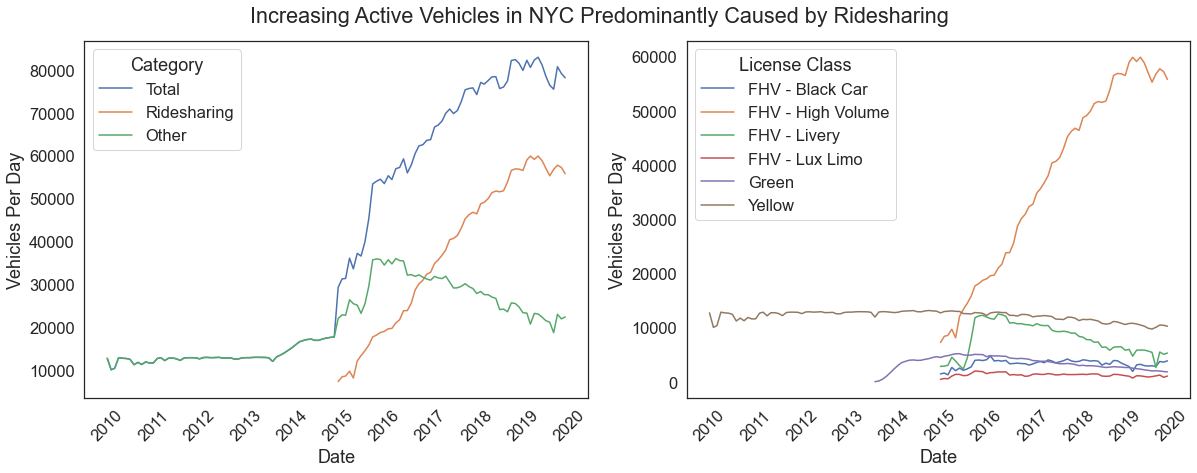

In [14]:
## Plot vehicles per day
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Vehicles Per Day', hue='Category', data=trip_month_total)

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Vehicles Per Day', hue='License Class', data=tlc_d)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.suptitle('Increasing Active Vehicles in NYC Predominantly Caused by Ridesharing')

Above, we've plotted two time-series graphs containing the change in vehicles per day over time. On the left, we have a graph that helps visualize the difference between the growth in active vehicles within ridesharing and non-ridesharing. On the right, we have a complement to the previous graph, providing a view of each sub-license class within non-ridesharing.

Looking at the graph, we can see increase in total vehicles per day since 2015 and that it's largely caused by the introduction of ride sharing. Specifically, we notice a steady increase of ~10,000 vehicles per day from 2015-2019 before leveling out around the mid 50,000's.

On the graph, we also notices a spike in non-ridesharing in 2015, but this can be better explained by the introduction of new FHV observations in the dataset. Something that's more interesting is the spike in FHV-Livery around 2016 before slowly decreasing. This is best explained by the categorization of FHV - High Volume in the dataset. Specifically, a FHV company is considered High Volume if it dispatches at least 10,000 trips day. After analyzing the FHV dataset, this is best explained by the introduction of smaller ridesharing companies.

As a result, from this trend, we can see an increasing number of active vehicles in NYC from ridesharing.

## Trips and Vehicles Per Day Relationship

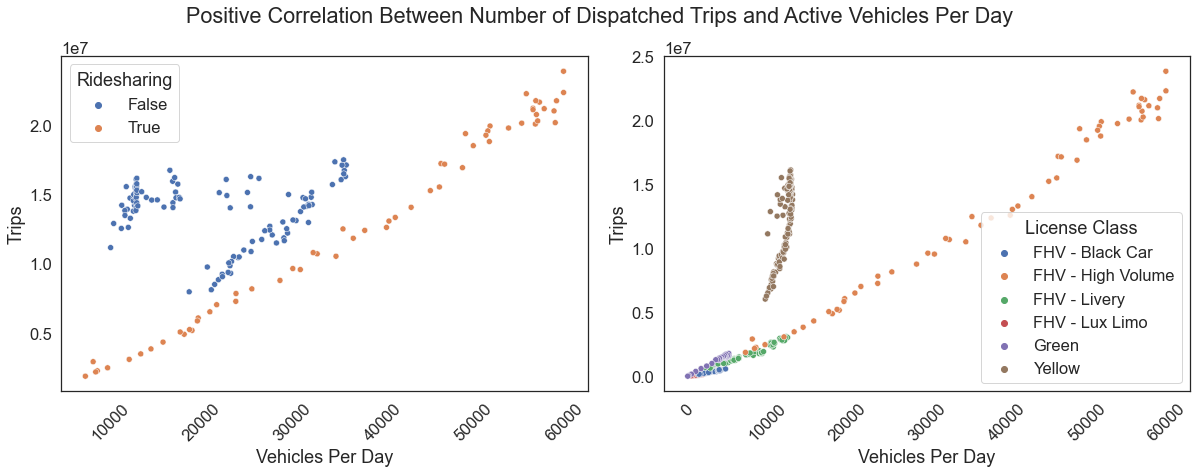

In [15]:
## Plot correlation between trips and vehicles per day
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.scatterplot(x='Vehicles Per Day', y='Trips', hue='Ridesharing', data=trip_month)

tmp_d = tlc_d.copy(deep=True)
tmp_d = tmp_d.apply(unaverage, axis=1)
tmp_d = tmp_d[['Date', 'License Class', 'Trips Per Day', 'Vehicles Per Day']] 
tmp_d.columns = ['Date', 'License Class', 'Trips', 'Vehicles Per Day']

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.scatterplot(x='Vehicles Per Day', y='Trips', hue='License Class', data=tmp_d)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.suptitle('Positive Correlation Between Number of Dispatched Trips and Active Vehicles Per Day')

From the plots above, we notice a positive correlation between trips and vehicles per day. From the plot on the left, we can see the difference in the relationship between ridesharing and non-ridesharing. Specifically, we notice a pretty linear relationship for ridesharing while the non-ridesharing seems to be clustered into 3 groups. Looking at the plot on the right, we can start to break down these groups within non-ridesharing. We notice that every license class, other than Yellow Taxis, all follow a similar linear relation. However, taxis are seems to increase in number of trips (likely overtime) while keeping the total number of vehicles per day more or less the same.

An explanation for this requires some outside knowledge on the specifics on how taxis function in NYC. Specifically, to operate a yellow taxi one must first purchase a taxi medallions, which is both expensive and limited. This was introduced under the Haas Act which limited the number of active taxi cabs (which is currently ~11,000), bringing the supply of taxicabs closer to public's demand. Therefore, the fluctuations in trips provided by yellow taxis are less related to the total number of active vehicles and closer to the current level of demands by the public.

## Trips and Shared Trips

In [16]:
## Generate tmp dataset for individual License Class
tmp_d = tlc_d.copy(deep=True)
tmp_d = tmp_d.apply(unaverage, axis=1)
tmp_d = tmp_d[['Date', 'License Class', 'Trips Per Day', 'Vehicles Per Day', 'Trips Per Day Shared']] 
tmp_d.columns = ['Date', 'License Class', 'Trips', 'Vehicles Per Day', 'Trips Shared']

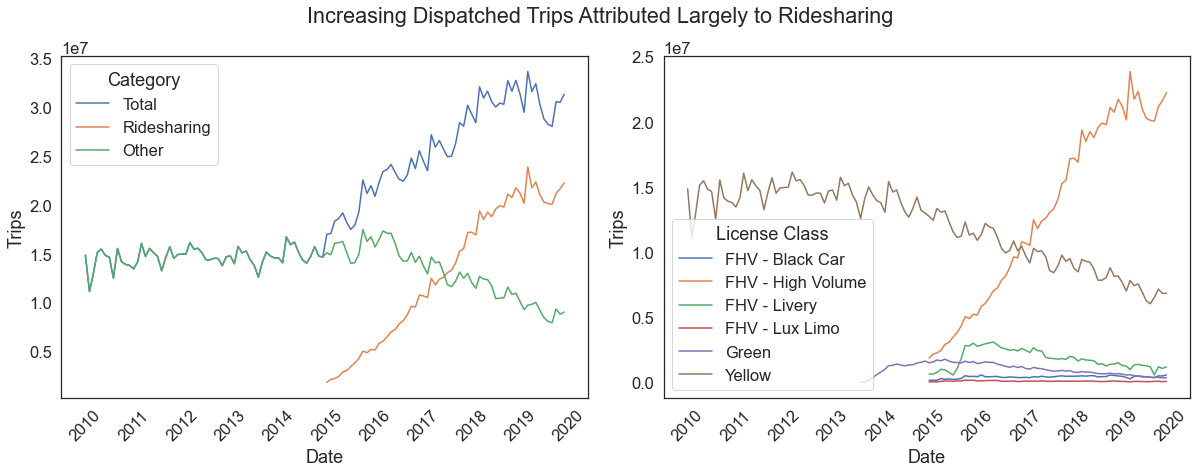

In [17]:
## Plot Trips 
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Trips', hue='Category', data=trip_month_total)

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Trips', hue='License Class', data=tmp_d)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.suptitle('Increasing Dispatched Trips Attributed Largely to Ridesharing')

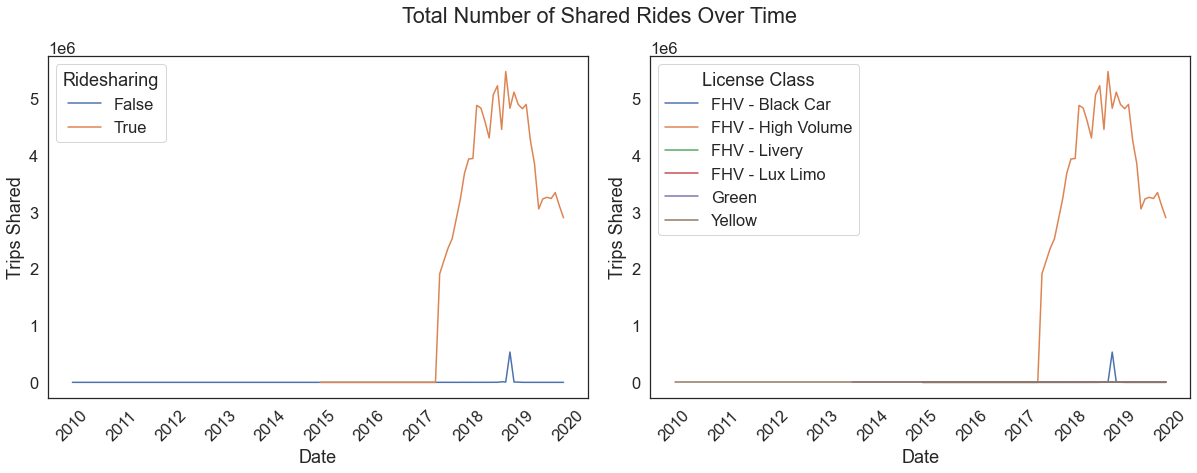

In [18]:
## Plot Shared Trips 
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Trips Shared', hue='Ridesharing', data=trip_month)

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.lineplot(x='Date', y = 'Trips Shared', hue='License Class', data=tmp_d)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.suptitle('Total Number of Shared Rides Over Time')

Here we've provided 4 plots showing the changes in the total dispatched trip and total dispatched shared trips provided by ridesharing and non-ridesharing companies.

In the plots for total dispatched trips, we can clearly see that overall the total number of dispatched trips have risen since introduction and popularization of ridesharing in 2015. Since then, we can see the steady rise in trips provided ridesharing and the decline in other car-based transportation services in NYC. In the most recent years, we can see that ridesharing now contributes to roughly 66% of the total number of dispatched trips every month.

Next, we have plots showing the number of trips shared in ridesharing vs. not ridesharing. From this, we can see that ridesharing accounts for almost all of the trips shared. Furthermore, using this plot in conjunction with the plot on total trips, we can see that shared trips account for roughly 10% of the activity. Lastly, this indicates that shared trips is an idea that has been recently introduced and only adopted by ridesharing platforms like Uber and Lyft.

## Trips Seasonal Trends

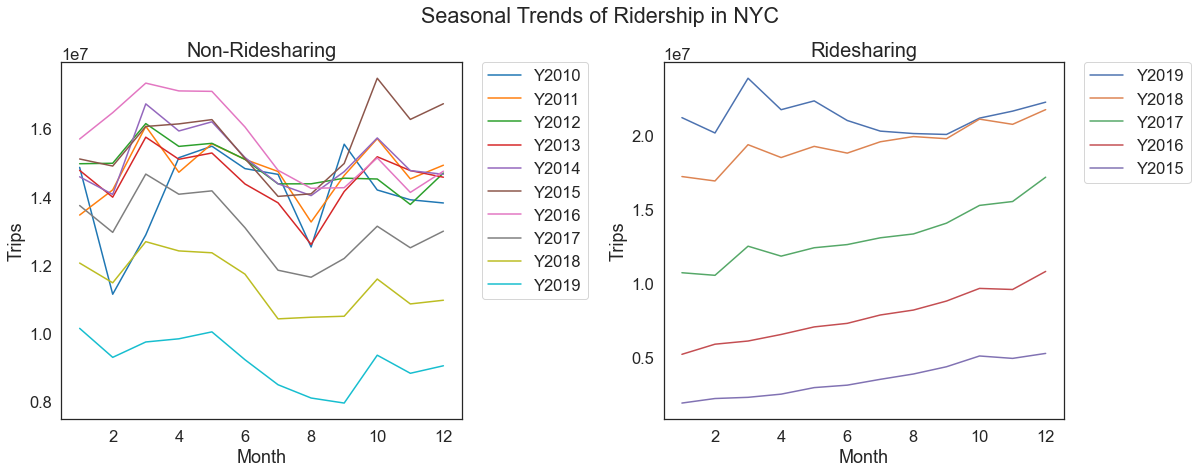

In [19]:
## Separate trip_month into categories per year
temp = trip_month.copy(deep=True)
temp['Month']=trip_month['Date'].apply(lambda x: x.month)
temp['Year']=trip_month['Date'].apply(lambda x: 'Y'+str(x.year))

## Split temp into 
ride = temp[temp['Ridesharing']==True]
non_ride = temp[temp['Ridesharing']==False]

## Plot Seasonal Trends for Ridesharing and non-Ridesharing
palette = sns.color_palette("tab10")
fig = plt.figure(2)
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='Trips', hue = 'Year', data=non_ride, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Non-Ridesharing', fontsize=20)
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='Trips', hue = 'Year', data=ride)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title('Ridesharing', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_ = plt.suptitle('Seasonal Trends of Ridership in NYC')

On the left plot, we plotted the total number of non ridesharing trips per month from 2010 to 2019. On the right plot, we plotted the total number of ridesharing trips per month from 2015 to 2019.

In the first plot with data on trips without ridesharing, we can see a distinct trend where trips are generally higher in the beginning and end of the year. Trips per month are generally at their lowest during the summer months, most evident around August. This trend may be due to people tending to stay indoors during New York City's hottest months (June to September). From the second plot, we can tell that there are no data for ridesharing trips prior to 2014. However, starting from 2014, there is a noticeable continuous increase in ridesharing trips all the way up to 2020. This continous increase could have hidden possible seasonal trends for ridesharing trips. Only in 2019 do we see a trend in trips with ridesharing that is similar to the seasonal trend in trips without ridesharing. This may be because ridesharing reached its peak popularity since it seems like ridesharing growth slowed toward the end of 2018 compared to the growth of trip from previous years.

# FHV Aggregate Data

## General Structure

The FHV Aggregate Dataset is structured in a tabular format as the observations are rows and the attributes are stored in the columns. Each row in the dataset stores the monthly data of the total dispatched trip, total shared trips, and the unique dispatched different for-hire vehicle companies in NYC. However, since we are only concerned with the effects of ridesharing vehicles with high volume for-hire companies, we filterd these aggregates into a summary of strictly for-hire companies like Uber, Lyft, Via, and Juno. While this results in a loss of data, the TLC datasets already provided a similar summary of a higher granularity. Since this dataset only includes FHV, this dataset isn't as useful as the TLC dataset in terms of independently answering our data science question. Instead, we take advantage of the more fine-grained granularity of the observations (broken down into separate companies) to explain any unexplainable trends in the TLC dataset. Similar to the TLC dataset, the FHV aggregate dataset is provided by the TLC in NYC. As a result, it has a similar temporality with datetimes being situated in EST and a similar faithfulness.

Below, we perform data analysis to find trends on the monthly trips for each company. 

## Company Specific Analysis

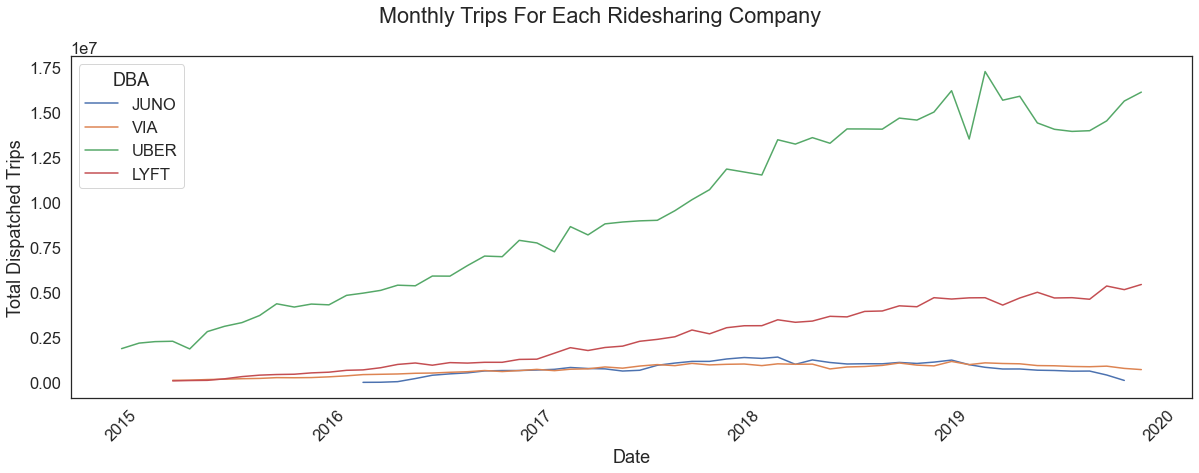

In [20]:
## Plot Monthly Dispatched Trips Separated By Ridesharing Companies
plt.xticks(rotation=45) 
sns.lineplot(x='Date' , y = 'Total Dispatched Trips', hue = 'DBA', data = fhv_d) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

_ = plt.suptitle('Monthly Trips For Each Ridesharing Company') 

In the plot above, we were able to display the Total Dispatched Trips of each company from the years of 2015 to 2020. Based on this plot, we were able to see that there was a significant increase of total dispatched trips from the ridesharing company Uber. This could be because Uber is a well known ridesharing company compared to the others. The ridesharing company Lyft also shows a slow, but constant increase in Total Dispatched Trips. The ridesharing companies Via and Juno did not show any signnificant increase nor decrease in trips. This might be because they are simply not as commonly used in NYC or another factor to take into consideration is that Juno decided to shut down in late 2019.

This trend also confirms the bizarre spike in non-ridesharing FHV activity in the TLC dataset since it indicates the start of many smaller ridesharing companies which may have been excluded from the high-volume categorization due to the small number of dispatched monthly rides.

# NYC GHG Inventory

## General Structure

The GHG Emissions dataset was formatted in a CSV format, but the layout was sub-optimal. After data cleaning, we were able to properly format and extract points of interests, leaving us with a tabular dataset containing annual observations for GHG emitted and energy consumed. While we would've much preferred a dataset of finer granularity, the dataset provides annual aggregates as part of an annual summary on the state of NYC. Since our question is concerned with NYC as a case-study on the effects of ridesharing on GHG emissions, this dataset is well within the scope of our question and serves as the missing part of our trips datasets. Since this dataset is from an annual summary of the state of NYC, the temporality of the dataset is situated in EST. Furthermore, the origins of the dataset suggests that we can trust the legitimacy and faithfulness of the observations. Although the data comes from a reputable source, due to the nature of the attributes, we should in mind that these are number are likely estimates and will have a range of error associated with them.

Below, we perform data analysis to find trends on the GHG emissions and energy consumed by passenger cars in NYC.

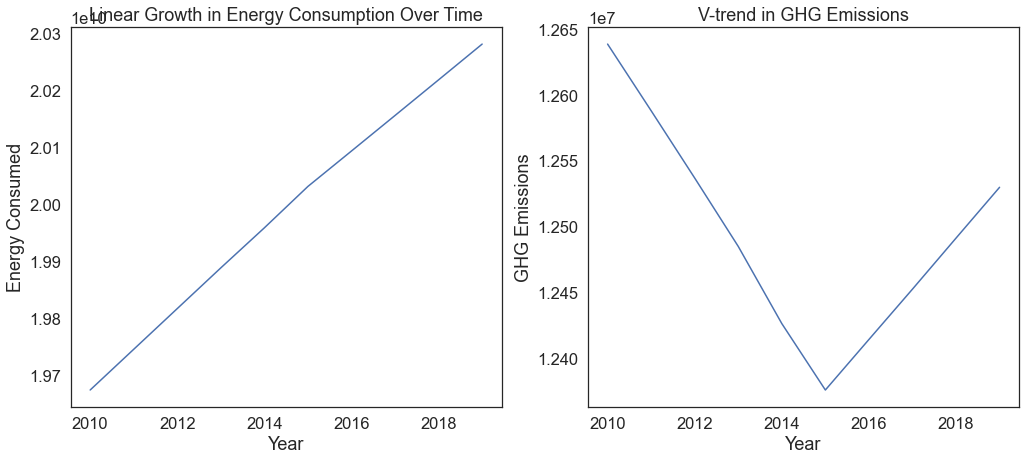

In [21]:
## Plot GHG emissions and Energy Consumption From Passenger Cars
ax1 = plt.subplot(1, 2, 2)
sns.lineplot(x = 'Year', y = 'GHG Emissions', data = annual_data)
ax1.set_title('V-trend in GHG Emissions', fontsize=18)
ax1.title.set_position([.5, 1.05])


ax2 = plt.subplot(1, 2, 1)
sns.lineplot(x = 'Year', y = 'Energy Consumed', data = annual_data)
ax2.set_title('Linear Growth in Energy Consumption Over Time', fontsize=18)
ax2.title.set_position([.5, 1.05])


In the first plot of total energy consumed against the year, the slope up to 2015 is higher than the slope after 2015. Perhaps this shows that since the start of ridesharing, the rate of increasing energy consumption decreases, indicating that ridesharing is related with lowering energy consumption.

On the right, we plot the change in GHG Emissions by passenger cars in NYC over the span of the last decade. From 2010 to 2015, we notice a consistent decrease YoY. Many factors could've contributed like the increasing efficency of cars or a decrease in personal cars on the road in favor of other means of transportation. By analyzing the increasing energy consumed with the decline in GHG emissions, there's some merit in the idea that cars have become more efficient over time. However, something that was interesting was the increase in GHG emissions starting in 2015. Around the same time, our other datasets also indicated a rising growth in vehicles per day as well as dispatched trips, which was caused by the booming acceptance of ridesharing.

# NYC Bus and Subway Data

## General Structure

The NYC Bus and Subway dataset was compiled from 4 separate sources in a xlsx format since each source were missing important data that we needed. After joining the data from these 4 sources into 2 separate datasets, we joined the two datasets into one for easier access. We proceeded to clean the data and remove unnecessary columns allowing, leaving us with a dataset containing annual total observations for bus and subway rides. We are trying to show that as ridesharing rise to popularity, people are abandoning public transportation causing GHG emissions to rise. As a result, this dataset is within the scope of our question and serves as a further analysis of our possible findings. Since this dataset is from an annual summary of the state of NYC, the temporality of the dataset is situated in EST which should not have a noticeable effect on the data since the time is recorded in years. Furthermore, the dataset originated from the data gathered by the Metropolitan Transportation Authority, a reputable source, meaning that we can trust the legitimacy and faithfulness of the observations. Due to the nature of the attributes, we are aware that these numbers are likely estimates and will have a range of error associated with them.

Below, we perform data analysis to find trends on the bus and subway rides in NYC to possibly explain trends from the GHG Emissions observed in the graph above.

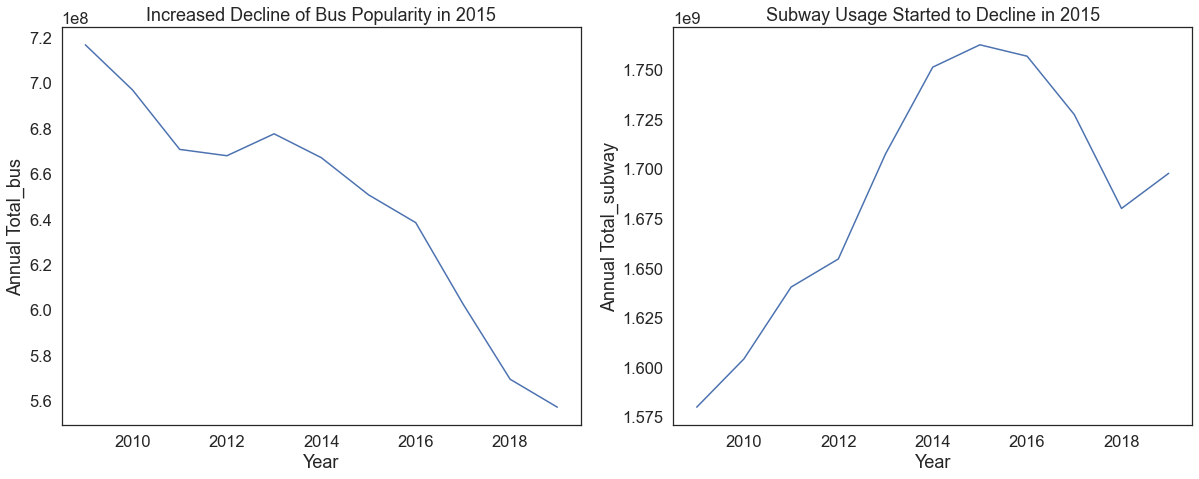

In [22]:
## Plot the changes in Bus and Subway Usage in NYC
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x = 'Year', y = 'Annual Total_bus', data = public_trans)
ax1.set_title('Increased Decline of Bus Popularity in 2015', fontsize=18)
ax1.title.set_position([.5, 1.05])


ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x = 'Year', y = 'Annual Total_subway', data = public_trans)
ax2.set_title('Subway Usage Started to Decline in 2015', fontsize=18)
ax2.title.set_position([.5, 1.05])

plt.tight_layout() 

On the left plot, we plotted the annual total number of bus rides from 2010 to 2019. On the right plot, we plotted the annual total number of subway rides from 2015 to 2019.

In the first plot with data on bus rides, we can see a trend where rides are decreasing overall but there is an increase in the rate of decreate starting on 2015. Similarly, starting on 2015, the second plot shows that subway rides are generally decreasing starting on 2015. Both of these trends could indicate the cause of the increase in GHG emissions from 2015. The popularization of ridesharing in 2015 could have moved people from using public transportation to ridesharing due to the overall convenience of ridesharing. 

# Analysis

From our initial exploratory data analysis on each of our datasets, we can see an interesting trend starting in 2015. Specifically, around this time, we noticed an increase in GHG emissions, increase in trips from passenger cars, increase in vehicles per day, and a decrease in subway usage. Furthermore, it's was also around this time when ridesharing was being introduced and popularized within New York City. In this section, we'll go deeper than just analyzing the visual trends of our datasets by measuring the correlation between these attributes.

To measure the correlation between attributes of interest, we'll be using Pearson's correlation. This decisions was driven primarily by two constraints which originate from the nature of the data as well as the size. For one, we are unable to use statistical techniques like linear regressions since our data violates the assumption of no autocorrelation. Since each our observations represents a monthly snapshot of transportation data, each future observation is dependent on the state of past observations. An example of this would be the number of vehicles per day associated with ridesharing on a given month is dependent on the number of vehicles per day on the previous month since a percentage of new drivers are retained month over month. Next, while we have months of data related to transporation, we only have an annual aggregate of GHG emissions and public transportation. In order to connect monthly trip data with annual GHG emissions, we had to aggregate trip data and create an annual representation for each year. However, this also reduces the amount of observations have, which impacts the use of more data-intensive approaches.

Below, we'll explore 4 relationships: GHG emissions' relations with total dispatched trips, GHG emissions' relations with ridesharing dispatched trips, GHG emissions' relations with subway usage, and subway usage's relations with ridesharing.

In [23]:
## Pearson's Correlations
# GHG emissions and trips overall
x = annual_data['Ridesharing Trips'] + annual_data['Trips']
y = annual_data['GHG Emissions']
print('GHG Emissions and Total Dispatched Trips:', pearsonr(x,y)[0])

# GHG emissions and only ridesharing dispatched trips
x = annual_data[annual_data['Year'] >= 2015]['Ridesharing Trips']
y = annual_data[annual_data['Year'] >= 2015]['GHG Emissions']
print('GHG Emissions and Ridesharing Dispatched Trips:', pearsonr(x,y)[0])

# GHG emissions and public transportation
x = annual_data['Annual Total_subway']
y = annual_data['GHG Emissions']
print('GHG Emissions and Annual Subway Usage:', pearsonr(x,y)[0])

# subway usage and ridesharing availability
x = annual_data[annual_data['Year'] >= 2015]['Ridesharing Vehicles Per Day']
y = annual_data[annual_data['Year'] >= 2015]['Annual Total_subway']
print('Annual Total Subway Usage and Average Annual Ridesharing Vehicles Per Day:', pearsonr(x,y)[0])

GHG Emissions and Total Dispatched Trips: -0.25061512640225103
GHG Emissions and Ridesharing Dispatched Trips: 0.9900910105245798
GHG Emissions and Annual Subway Usage: -0.9709954516472047
Annual Total Subway Usage and Average Annual Ridesharing Vehicles Per Day: -0.9389865529363876


Looking at the GHG Emissions and Total Dispatched Trips, we get a pearson's correlation of -0.25, which tells us that there's little to no correlation between GHG emissions and the number of trips dispatched by cars in New York City. From our data analysis on trip data, this is expected as dispatched trips were stagnant before the introduction of ridesharing but GHG emissions were also dropping during this period. Instead, we should directly focus on the correlation of ridesharing and GHG emissions, which gives us a pearson's correlation of 0.99. This suggests that the recent rise in GHG emissions in NYC is largely correlated with the surge in ridesharing popularity within the city.

In our analysis of Trips and Vehicles Per Day, we saw a growing number of ridesharing vehicles and total trips dispatched from these vehicles from 2015 to 2019. Despite vehicles per day increasing by 500% and dispatched trips increasing by 900% for ridesharing, the reduction in other car services don't account for this massive increase during the span of 2015 to 2019. Due to supply and demand, this suggests that the demand for ridesharing services must've originated from another source other than previous taxi riders. From our data analysis, a potential source of this demand is subway riders. As a result, we also look at the correlation between GHG emissions and subway usage, which resulted in a pearson's correlation of -0.97. This suggests that the recent rise in GHG emissions in NYC is also largely, negatively correlated with the drop in subway usage.

Lastly, we measure the correlation between the subway usage and ridesharing within the city, which resulted in a pearson's correlation of -0.94. This suggests that the recent decline in subway usage in NYC is also largely, negatively correlated with the increase in ridesharing. 

Putting all of this together, our study shows that the increase GHG emissions in New York City is correlated with the introduction of ridesharing as well as the decline in subway usage. Furthermore, the decline of subway usage is also largely correlated to the increasing abundance of ridesharing. Although we can't definitively explain the cause of the increase in GHG emissions with just correlations, we can explain the impact of the introduction of ridesharing services. From our exploratory and inferential analysis, it's clear that ridesharing has negatively impacted the GHG emissions in New York City. However, we can't discern whether or not this increase in GHG emission is directly caused by ridesharing or indirectly by the effects of ridesharing on subway usage. Regardless, if the rising GHG emissions are a concern, it's clear that the need for regulation of ridesharing is heavily needed.

# Ethics & Privacy

There should be no privacy issues related to our question, dataset, and analysis. In regards to the data we used, all data were connected anonymously from ride-sharing companies and the data can not be traced back to an individual. The data also did not include any data on protected group status. The data we used are available to the public so we do not need to secure our data storage. The data were collected as a whole, meaning there weren't any excluded populations from the data. The ridesharing data were collected from all trips in New York City. The GHG emissions data were collected from all activities taking place in New York City. The subway data we chose to use reflects the data collected from all subways in New York City. However, the subway data did not include trips during major holidays, therefore we can only assume that the amount of trips during major holidays remained relatively the same from 2005 to 2019. From all three datasets, there might be a few discrepencies due to human and machine error during data collection which we will keep in mind when forming our conclusion. 

There are a few things to consider involving our analysis. For one, we only proved that there exists a correlation and not a causation relationship between ride-sharing and GHG emissions. In addition, our analysis could potentially disproportionately harm ride-sharing companies and their employees since our analysis is leaning toward the possibility that ride-sharing causes increases in GHG emissions. Since ride-sharing have been thought to be a better alternative for GHG emissions, more environmentally conscious consumers would likely forgo ride-sharing. As a result, we will state the possible limitations and other factors contributing to the increase of GHG emissions in our conclusion. This is to inform readers that there needs to be further analysis before concluding the causal relationship between ride-sharing and GHG emissions. 

# Conclusion & Discussion

Given the ongoing acceleration of climate change, we wanted to see how the widespread adoption of ridesharing has affected greenhouse gas emissions and public transportation in a heavily populated urban area like New York City. Previous studies such as the ones linked at the top have shown contradictory results. We used several datasets, two from the City of New York describing monthly statistics for various types of for-hire vehicles from 2010 to the present, such as taxis and ridesharing vehicles. Another dataset we used was from New York University documenting greenhouse gas emissions in New York City over the past 15 years. We decided to exclude data from 2020 in our analysis due to the anomalous COVID-19 pandemic. For public transportation, we used a dataset from the Metropolital Transportation Authority on bus usage in NYC between 2014 and 2019 and a dataset from Baruch College in New York on subway usage in NYC between 2009 and 2017. 

To answer the first part of our research question, we decided to use Pearson's correlation to measure the relationship between greenhouse gas emissions and each of three different variables: total dispatched vehicle trips, total dispatched ridesharing trips, and subway usage. To answer the second part of our research question, we decided to measure the relationship between total dispatched ridesharing trips and subway usage, also using Pearson's correlation. We found a modest negative correlation between greenhouse gas emissions and total dispatched trips, a strong positive correlation between greenhouse gas emissions and total ridesharing trips, and strong negative correlations between greenhouse gas emissions and subway usage and between total ridesharing trips and subway usage. The relationship between GHG emissions and ridesharing was the opposite of what our hypothesis suggested and we theorized that it was due to ridesharing replacing public transportation, which was a much more green form of transit. Despite this, there are several limitations to our project that prevent us from honestly making definitive conclusions. Firstly, we only analyzed data from a single city. Secondly, correlation does not imply causation. There are other factors that could contribute to the rise in greenhouse gas emissions, such as population growth and the increase in use of consumer electronics such as smartphones. 

Climate change is one of the most pressing issues facing global society today. According to the EPA[1], the transportation sector generates the largest share of emissions in the United States. Logically, any solution to stave off the problem of catastrophic climate change must involve reducing transportation emissions. If public transportation decreases emissions and ridesharing increases them, this must be a factor that policymakers take into account. Further study must be done on the relationship between ridesharing, public transportation, and greenhouse gas emissions in order to create a more sustainable future.  

1. https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions

# Team Contributions

Group
 - Research Question
 - Hypothesis
 - Final Project Video & Slideshow

Vasny Bautista
 - EDA: FHV Aggregate Data
 - Ethics & Privacy (Proposal)
 - Video: Analysis 

Saikrishna Chandhrasekhar
 - Conclusion & Discussion
 - Data Cleaning: FHV Aggregate Dataset (Cleaning Attributes)
 - Video: Conclusion, Recording and putting together 

Andrew Li
 - Overview
 - Data Cleaning: GHG Emissions (Standardize numbers)
 - EDA: GHG Emissions
 - Video: Overview & Hypothesis

Brian Li
 - Background & Prior Works
 - Datasets: FHV Aggregate, TLC Aggregate Dataset
 - Data Cleaning: FHV Aggregate, TLC Aggregate Dataset
 - EDA: TLC Aggregate Data, Vehicles Per Day, Trips and Vehicles Per Day Relationship, Smalls additions to other sections of EDA
 - Analysis
 - Video: TLC Aggregate Dataset EDA

Alice Lu
 - Datasets: GHG Emissions, Public transportation
 - Data Cleaning: GHG Emissions, Public transportation
 - EDA: Trips and Shared Trips, Trips Seasonal Trends, NYC Bus and Subway Data
 - Ethics & Privacy
 - Video: GHG Emissions and Public Transportation EDA